# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")



Processing record 1|punta arenas
Processing record 2|almaznyy
City not found. skipping.
Processing record 3|cape town
Processing record 4|arraial do cabo
Processing record 5|komsomolskiy
Processing record 6|butaritari
Processing record 7|pevek
Processing record 8|mar del plata
Processing record 9|hermanus
Processing record 10|cherskiy
Processing record 11|van
Processing record 12|hami
Processing record 13|camacha
Processing record 14|georgetown
Processing record 15|ust-nera
Processing record 16|port augusta
Processing record 17|xiongzhou
Processing record 18|barrow
Processing record 19|sorland
City not found. skipping.
Processing record 20|jinxi
Processing record 21|ushuaia
Processing record 22|jamestown
City not found. skipping.
Processing record 23|cayenne
City not found. skipping.
Processing record 24|coron
Processing record 25|mataura
Processing record 26|dali
Processing record 27|rikitea
Processing record 28|longyearbyen
City not found. skipping.
Processing record 29|neiafu
Proces

Processing record 245|kaeo
Processing record 246|beyla
Processing record 247|saskylakh
Processing record 248|pemba
Processing record 249|dutse
Processing record 250|mulatupo
Processing record 251|katobu
Processing record 252|moose factory
Processing record 253|makakilo city
Processing record 254|kavieng
Processing record 255|kruisfontein
Processing record 256|acapulco
City not found. skipping.
Processing record 257|verkhnyaya inta
Processing record 258|vangaindrano
Processing record 259|inuvik
Processing record 260|bull savanna
Processing record 261|vestmannaeyjar
Processing record 262|muravlenko
Processing record 263|coacoatzintla
Processing record 264|quzhou
City not found. skipping.
Processing record 265|tevaitoa
Processing record 266|henties bay
Processing record 267|bakchar
Processing record 268|lebu
Processing record 269|dzerzhinskoye
City not found. skipping.
Processing record 270|quatre cocos
City not found. skipping.
Processing record 271|nador
Processing record 272|dingle
Pro

Processing record 490|xichang
Processing record 491|nanortalik
Processing record 492|kourou
Processing record 493|jasidih
Processing record 494|coos bay
Processing record 495|umea
Processing record 496|provideniya
Processing record 497|kampot
Processing record 498|albion
Processing record 499|yarensk
Processing record 500|broken hill
Processing record 501|abha
Processing record 502|atikokan
Processing record 503|yilan
Processing record 504|sao luis de montes belos
City not found. skipping.
Processing record 505|solnechnyy
Processing record 506|nalut
Processing record 507|mao
Processing record 508|arauca
Processing record 509|skibbereen
Processing record 510|hovd
Processing record 511|slave lake
Processing record 512|sibolga
Processing record 513|gazanjyk
Processing record 514|kupang
Processing record 515|bubaque
City not found. skipping.
Processing record 516|raudeberg
Processing record 517|hualmay
City not found. skipping.
Processing record 518|paka
City not found. skipping.
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
city_dataframe = pd.DataFrame({
                                "City Name": city_name,
                                "Country": country,
                                "Cloudiness": cloudiness, 
                                "Max Temp": max_temp, 
                                "Wind Speed": wind_speed,
                                "Humidity": humidity,
                                "Lat": lat, 
                                "Lng": lng,
                               })

city_dataframe = city_dataframe.rename_axis("City ID")
city_dataframe.head()

,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
City ID,,,,,,,,
0,Punta Arenas,CL,90,57.20,21.85,51,-53.1500,-70.9167
1,Almaznyy,RU,75,23.00,20.13,74,48.0448,40.0450
2,Cape Town,ZA,0,72.00,9.22,88,-33.9258,18.4232
3,Arraial do Cabo,BR,100,76.51,15.68,88,-22.9661,-42.0278
4,Yangi Marg`ilon,UZ,100,42.80,4.61,61,40.4272,71.7189


In [5]:
# Export the city data into a .csv.
city_dataframe.to_csv("city_dataframe.csv")
    
#updated csv to match re-run block 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_dataframe = pd.read_csv("city_dataframe.csv")
city_dataframe

# reviewed with tutor as original code was not calling the correct data frame

,City ID,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
0,0,Punta Arenas,CL,90,57.20,21.85,51,-53.1500,-70.9167
1,1,Almaznyy,RU,75,23.00,20.13,74,48.0448,40.0450
2,2,Cape Town,ZA,0,72.00,9.22,88,-33.9258,18.4232
3,3,Arraial do Cabo,BR,100,76.51,15.68,88,-22.9661,-42.0278
4,4,Yangi Marg`ilon,UZ,100,42.80,4.61,61,40.4272,71.7189
...,...,...,...,...,...,...,...,...,...
558,558,Asău,RO,7,17.01,7.74,44,46.4333,26.4000
559,559,Brigantine,US,90,28.99,5.75,64,39.4101,-74.3646
560,560,Sibu,MY,40,75.20,1.14,100,2.3000,111.8167
561,561,Sola,VU,75,89.60,12.30,70,-13.8833,167.5500


In [7]:
city_dataframe[city_dataframe["Humidity"] <= 100]

,City ID,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
0,0,Punta Arenas,CL,90,57.20,21.85,51,-53.1500,-70.9167
1,1,Almaznyy,RU,75,23.00,20.13,74,48.0448,40.0450
2,2,Cape Town,ZA,0,72.00,9.22,88,-33.9258,18.4232
3,3,Arraial do Cabo,BR,100,76.51,15.68,88,-22.9661,-42.0278
4,4,Yangi Marg`ilon,UZ,100,42.80,4.61,61,40.4272,71.7189
...,...,...,...,...,...,...,...,...,...
558,558,Asău,RO,7,17.01,7.74,44,46.4333,26.4000
559,559,Brigantine,US,90,28.99,5.75,64,39.4101,-74.3646
560,560,Sibu,MY,40,75.20,1.14,100,2.3000,111.8167
561,561,Sola,VU,75,89.60,12.30,70,-13.8833,167.5500


In [8]:
# no cities with > 100%
city_dataframe_greater_than_100 = city_dataframe.query("Humidity >  100")
city_dataframe_greater_than_100

# 0 cities appear in the data frame, as there are no cities in the data frame with > 100% humidity 

,City ID,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

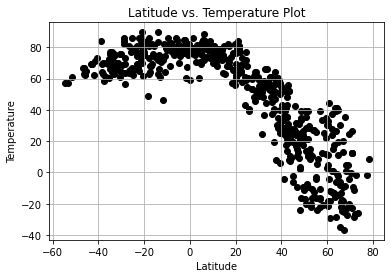

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
plt.show()
plt.savefig("Lat_Temp.png")

#reviewed as originally encountered issues getting the plot to save as a png

## Latitude vs. Humidity Plot

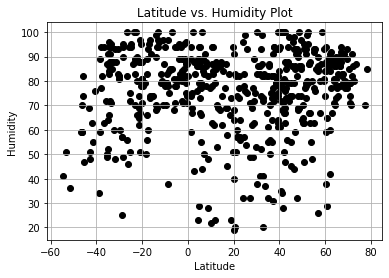

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.show()
plt.savefig("Lat_Humidity.png")


## Latitude vs. Cloudiness Plot

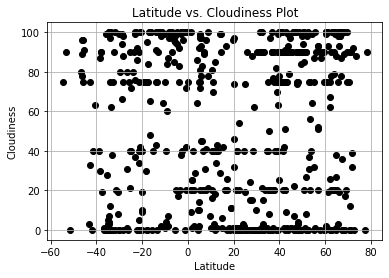

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.show()
plt.savefig("Lat_CLoudiness.png")


## Latitude vs. Wind Speed Plot

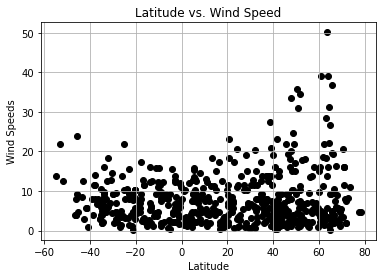

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
plt.title("Latitude vs. Wind Speed")
plt.show()
plt.savefig("Lat_Wind.png")


## Linear Regression

In [13]:
def linear_reg_plot(x_values,y_values, textcoords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,textcoords,fontsize=20,color="red",)
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8712472844664356


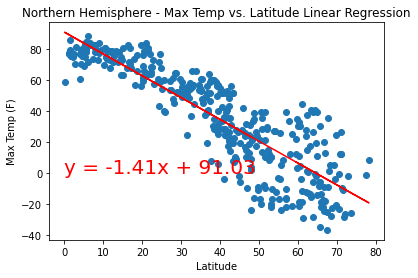

<Figure size 432x288 with 0 Axes>

In [49]:
northern_hemisphere = city_dataframe.loc[city_dataframe["Lat"] > 0]
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (0,0))
plt.savefig("N_Hemisphere_Max_Temp_Lat_Lin_Regression.png")


#discussed textcoords with tutor, learning how to adjust where the annoation appears on the graph 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4864039210194503


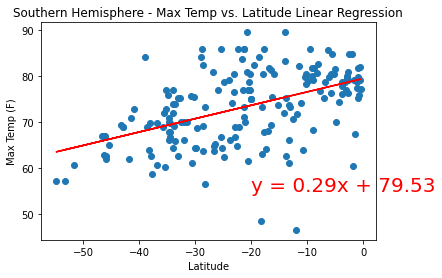

<Figure size 432x288 with 0 Axes>

In [50]:
Southern_hemisphere = city_dataframe.loc[city_dataframe["Lat"]<0]
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-20, 55))
plt.savefig("S_Hemisphere_Max_Temp_Lat_Lin_Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19165882066794768


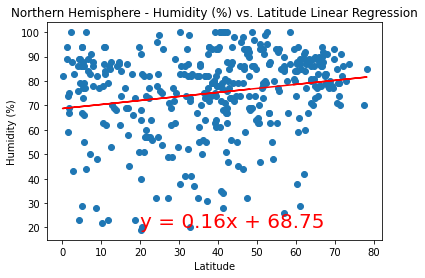

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (20,20))
plt.savefig("N_Hesiphere_Humidity_Lat_Lin_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35574415973440865


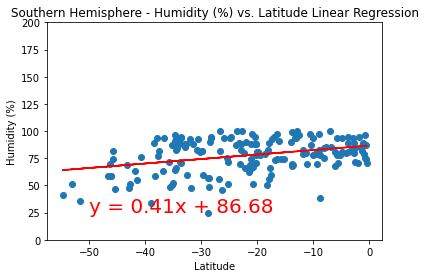

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
linear_reg_ploN_Hesiphere_Humidity_Lat_Lin_Regressiont(x_values,y_values, (-50, 25))
plt.savefig("S_Hesiphere_Humidity_Lat_Lin_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18059591555877366


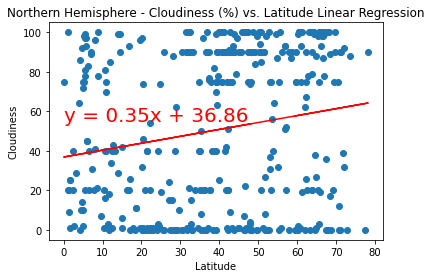

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (0,55))
plt.savefig("N_Hesiphere_Cloudiness_Lat_Lin_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21672813052285556


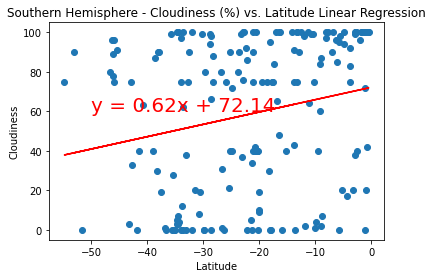

<Figure size 432x288 with 0 Axes>

In [59]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-50,60))
plt.savefig("S_Hesiphere_Cloudiness_Lat_Lin_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12599401697553347


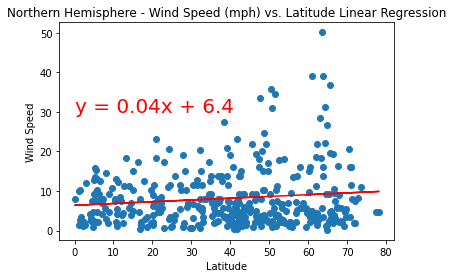

<Figure size 432x288 with 0 Axes>

In [60]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (0,30))
plt.savefig("N_Hesiphere_Wind_Lat_Lin_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.11368108694136778


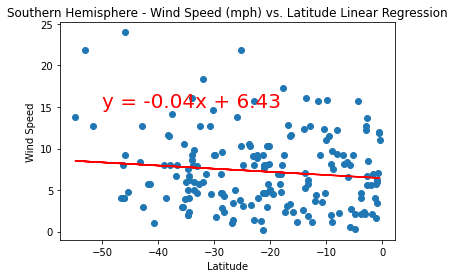

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-50,15))
plt.savefig("S_Hesiphere_Wind_Lat_Lin_Regression.png")

